In [1]:
#import macroparameters

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import plotly.express as px

    
import os, sys, shutil


def print_all_df(df):
    # Permanently changes the pandas settings
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', -1)
    
    # All dataframes hereafter reflect these changes.
    display(df)
    
    print('**RESET_OPTIONS**')
    
    # Resets the options
    pd.reset_option('all')
    

# Define Prefix of which experiment to analyse

In [11]:
prefix = "ALTE001"

In [12]:
# navigate into tidy_data_files and make a list of all files

os.chdir('/app/data/tidy_data_files')
os.getcwd()

items = os.listdir(".")

# lists all .csv
csv_list = []
for names in items:
    if names.endswith(".csv"):
        csv_list.append(names)
print(csv_list)



['ALTE002_tidy_data.csv', 'ALTE001_tidy_data.csv', 'ALTE003_tidy_data.csv']


In [13]:
# import the correct tidy dataset

print(os.getcwd())

# make file name
dataset = prefix +'_tidy_data.csv'

# import into pandas DF
all_gain_data = pd.read_csv(dataset, header=0)

# change back to /src for neatness
os.chdir('/app')

/app/data/tidy_data_files


In [14]:
# get the individual products
product_list = all_gain_data['Expression Product'].unique()
product_list

array(['GFP'], dtype=object)

# Plot all replicates for both gain settings

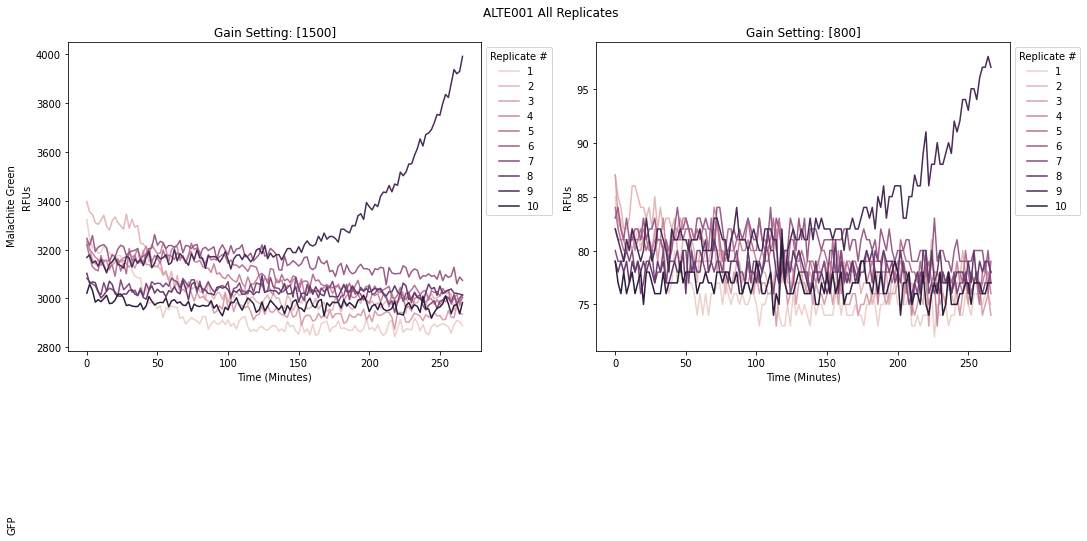

In [15]:
fig = plt.figure(figsize=(15,10))

plot_counter = 1

for i, product in enumerate(product_list):
    
    #just get the individual product
    product_subsection = all_gain_data[all_gain_data['Expression Product'] == product]
    
    # get individual gain values of product subsection
    gain_list = product_subsection['Gain Setting'].unique()
    
    for i, gain in enumerate(gain_list):
        

        
        #just get the individual gain of the product slice
        
        gain_subsection = product_subsection[product_subsection['Gain Setting'] == gain]
        
        
        # get individual gain

        ax = plt.subplot(2, 2, plot_counter)

        sns.lineplot(data = gain_subsection,
                x = 'Time (Minutes)',
                y = 'RFUs',
                hue = 'Replicate',
                legend='full',
                ax=ax)

        ax.legend(title="Replicate #", loc = 2, bbox_to_anchor = (1,1))
        ax.set(title="Gain Setting: " + str(gain_subsection['Gain Setting'].unique()))
        
        plot_counter += 1


fig.text(0.001, 0.65, 'Malachite Green', ha='center', rotation="vertical")
fig.text(0.001, 0.25, 'GFP', ha='center', rotation="vertical")


fig.suptitle(prefix+ " All Replicates")
fig.tight_layout()




##### Save fig


path = "/app/data/plots/"

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_all_replicates.png")


#navigate home for neatness
os.chdir('/app')



plt.show()



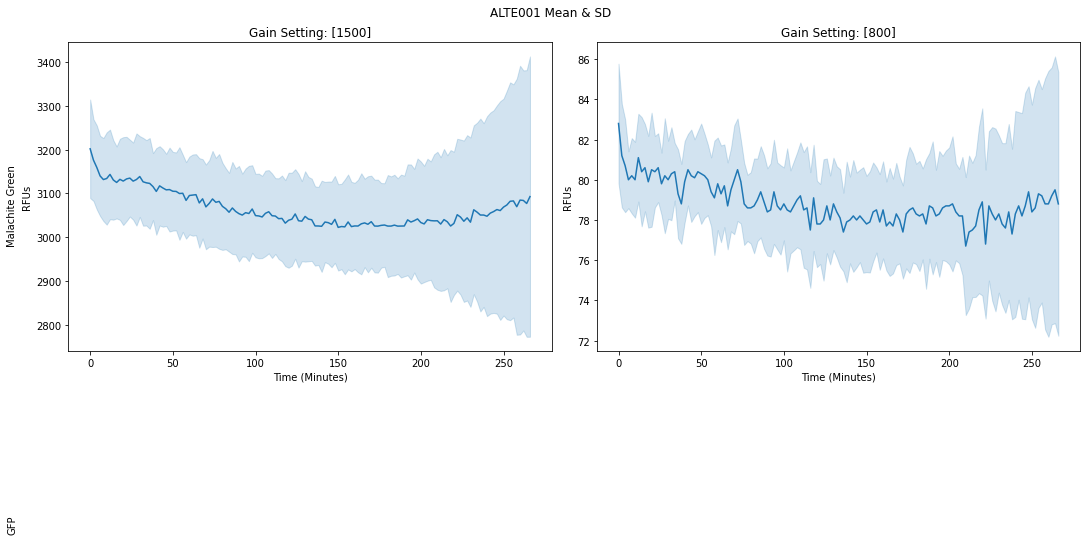

In [16]:
fig = plt.figure(figsize=(15,10))

plot_counter = 1

for i, product in enumerate(product_list):
    
    #just get the individual product
    product_subsection = all_gain_data[all_gain_data['Expression Product'] == product]
    
    # get individual gain values of product subsection
    gain_list = product_subsection['Gain Setting'].unique()
    
    for i, gain in enumerate(gain_list):
        

        
        #just get the individual gain of the product slice
        
        gain_subsection = product_subsection[product_subsection['Gain Setting'] == gain]
        
        
        # get individual gain

        ax = plt.subplot(2, 2, plot_counter)

        sns.lineplot(data = gain_subsection,
                x = 'Time (Minutes)',
                y = 'RFUs',
                ci = 'sd',
                legend='full',
                ax=ax)

        ax.set(title="Gain Setting: " + str(gain_subsection['Gain Setting'].unique()))
        
        plot_counter += 1

fig.text(0.001, 0.65, 'Malachite Green', ha='center', rotation="vertical")
fig.text(0.001, 0.25, 'GFP', ha='center', rotation="vertical")

fig.suptitle(prefix+ " Mean & SD")
fig.tight_layout()



##### Save fig


path = "/app/data/plots/"

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_mean_sd.png")


#navigate home for neatness
os.chdir('/app')

plt.show()


In [17]:
GFP = all_gain_data[all_gain_data["Expression Product"] == "GFP"]

timepoint = GFP[GFP["Time (Minutes)"] == 170]

timepoint = timepoint[timepoint['Gain Setting'] == 1500]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

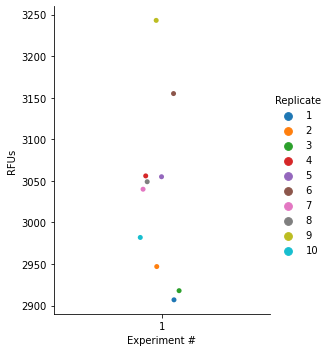

In [18]:
fig = plt.figure(figsize=(10,5))

ax1 = sns.catplot(
            data = timepoint,
            x = "Experiment #",
            y = "RFUs",
            hue="Replicate",
            ax=ax,
            height=5,
            aspect=.8)

ax1 = sns.boxplot(
            data=timepoint,
            x="Experiment #",
            y="RFUs",
            ax=ax,
            whis=np.inf)


fig.suptitle(prefix+ " Scatter Plot")
fig.tight_layout()


##### Save fig


path = "/app/data/plots/"

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_vertical_scatter_plot.png")


#navigate home for neatness
os.chdir('/app')

plt.show()


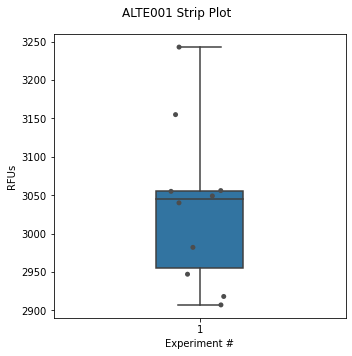

In [19]:
fig = plt.figure(figsize=(5,5))

ax = sns.boxplot(x="Experiment #", y="RFUs", data=timepoint, whis=np.inf, width=0.3)
ax = sns.stripplot(x="Experiment #", y="RFUs", data=timepoint, color=".3")

fig.suptitle(prefix+ " Strip Plot")
fig.tight_layout()


##### Save fig


path = "/app/data/plots/"

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_box_strip_plot.png.png")


#navigate home for neatness
os.chdir('/app')

plt.show()